In [1]:
import healpy as hp
import numpy as np
import os
import astropy.units as u
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# load map and assign file name

In [2]:
filename = 'COM_CMB_IQU-smica_2048_R3.00_full.fits'
cmb_map = hp.read_map(filename)

In [ ]:
# print map

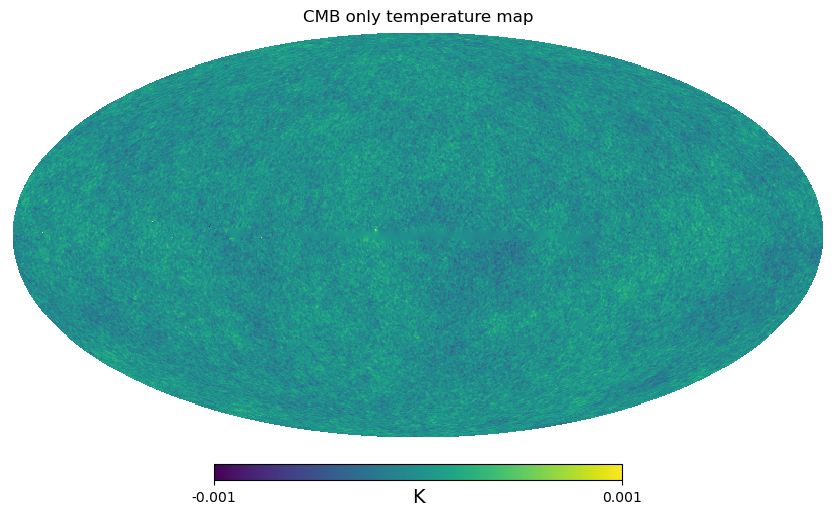

In [3]:
hp.mollview(cmb_map, min=-1e-3, max=1e-3, title="CMB only temperature map", unit="K")

In [ ]:
# load the binned TT CMB power spectrum that will be our target [not sure exactly what this means, but it was in a tutorial and I assume it is our reference or theory predictions]

In [4]:
!wget https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-TT-binned_R3.01.txt

--2022-11-30 16:21:53--  https://irsa.ipac.caltech.edu/data/Planck/release_3/ancillary-data/cosmoparams/COM_PowerSpect_CMB-TT-binned_R3.01.txt
Resolving irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)... 134.4.54.87
Connecting to irsa.ipac.caltech.edu (irsa.ipac.caltech.edu)|134.4.54.87|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7143 (7.0K) [text/plain]
Saving to: ‘COM_PowerSpect_CMB-TT-binned_R3.01.txt’

COM_PowerSpect_CMB- 100%[===================>]   6.98K  --.-KB/s    in 0s      

2022-11-30 16:21:53 (213 MB/s) - ‘COM_PowerSpect_CMB-TT-binned_R3.01.txt’ saved [7143/7143]



In [5]:
!head -3 COM_PowerSpect_CMB-TT-binned_R3.01.txt

# l                Dl               -dDl             +dDl             BestFit          
  4.77112240e+01   1.47933552e+03   5.07654876e+01   5.07654876e+01   1.46111304e+03
  7.64716065e+01   2.03496833e+03   5.47101576e+01   5.47101576e+01   2.06238073e+03


In [21]:
cmb_map

array([-1.2349988e-04, -9.2796152e-05, -6.3961874e-05, ...,
        1.0377157e-04,  8.6182328e-05,  8.6515050e-05], dtype=float32)

In [6]:
cmb_binned_spectrum = np.loadtxt('COM_PowerSpect_CMB-TT-binned_R3.01.txt')

In [ ]:
# compute power spectrum

In [7]:
lmax = 3000

In [8]:
test_cls_meas_frommap = hp.anafast(cmb_map, lmax=lmax, use_pixel_weights=True)

In [9]:
ll = np.arange(lmax+1)

In [22]:
sky_fraction = len(cmb_map) / len(cmb_map)

In [23]:
print(f"The map covers {sky_fraction:.1%} of the sky")

The map covers 100.0% of the sky


In [14]:
plt.style.use("seaborn-poster")

In [15]:
k2muK = 1e6

In [28]:
np.savetxt('ll_full.txt',ll*(ll+1.)*test_cls_meas_frommap*k2muK**2/2./np.pi / sky_fraction)

In [ ]:
# the above line is saving the y-value data of unmasked map to make comparison plot with masked (NB04)

In [ ]:
# plot the Dl vs l values. Top line is the reference line per tutorial. 

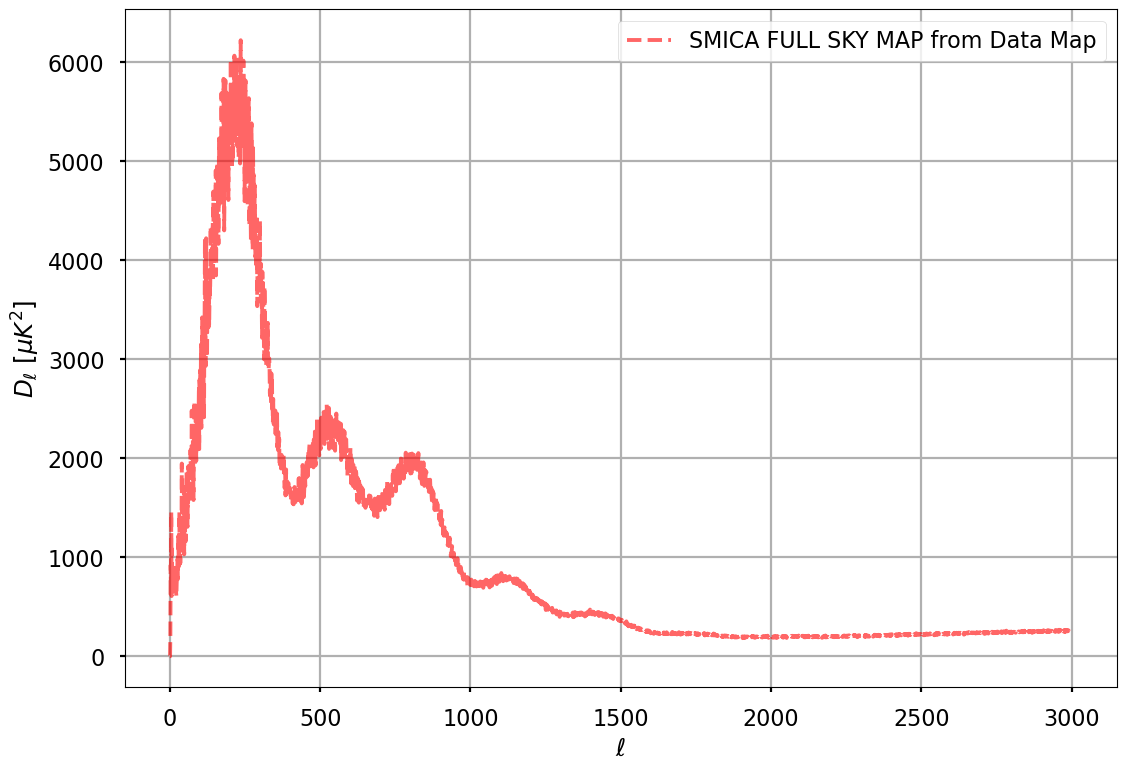

In [34]:
#plt.plot(cmb_binned_spectrum[:,0], cmb_binned_spectrum[:,1], '--', alpha=1, label='SMICA FULL SKY MAP release')
plt.plot(ll, ll*(ll+1.)*test_cls_meas_frommap*k2muK**2/2./np.pi , '--', alpha=0.6, label='SMICA FULL SKY MAP from Data Map',c='red')
plt.xlabel(r'$\ell$')
plt.ylabel(r'$D_\ell~[\mu K^2]$')
plt.grid()
plt.legend(loc='best')

In [ ]:
# https://www.zonca.dev/posts/2021-02-28-compute-planck-spectra-healpy-anafast.html